In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import statsmodels.api as sm
import scipy.stats as stats

In [2]:
# Importing datasets #

leb = pd.read_pickle('lebesgue.pkl')
neg = pd.read_pickle('neg.pkl')
pos = pd.read_pickle('pos.pkl')
v = pd.read_pickle('V_pot.pkl')

In [3]:
# Sorting and cleaning Datasets #

leb_intervals = leb['interval_length']
neg_intervals = neg['interval_length']
pos_intervals = pos['interval_length']
v_intervals = v['interval_length']
leb_mean = leb_intervals.mean()
neg_mean = neg_intervals.mean()
pos_mean = pos_intervals.mean()
v_mean = v_intervals.mean()
print("Lebesgue Mean: ", leb_mean)
print("Negative Mean: ", neg_mean)
print("Positive Mean: ", pos_mean)
print("V Mean: ", v_mean)

leb_rate = 1 / leb_mean
neg_rate = 1 / neg_mean
pos_rate = 1 / pos_mean
v_rate = 1 / v_mean

cleaned_leb = leb[leb['interval_length'] > 1]
cleaned_leb_intervals = cleaned_leb['interval_length']
clean_leb_mean = cleaned_leb_intervals.mean()
clean_leb_rate = 1 / clean_leb_mean
print("Cleaned leb mean:", clean_leb_mean)

cleaned_neg = neg[neg['interval_length'] > 1]
cleaned_neg_pos = cleaned_neg[cleaned_neg['interval_value'] == 'positive']
cleaned_neg = cleaned_neg[cleaned_neg['interval_value'] == 'negative']
# interval times in deeper well #
cleaned_neg_intervals = cleaned_neg['interval_length']
# interval times in shallower well #
cleaned_neg_pos_intervals = cleaned_neg_pos['interval_length']
clean_neg_pos_mean = cleaned_neg_pos_intervals.mean()
clean_neg_pos_rate = 1 / clean_neg_pos_mean
clean_neg_mean = cleaned_neg_intervals.mean()
clean_neg_rate = 1 / clean_neg_mean
print("Cleaned neg mean:", clean_neg_mean)

cleaned_pos = pos[pos['interval_length'] > 1]
cleaned_pos = cleaned_pos[cleaned_pos['interval_value'] == 'positive']
cleaned_pos_intervals = cleaned_pos['interval_length']
clean_pos_mean = cleaned_pos_intervals.mean()
clean_pos_rate = 1 / clean_pos_mean
print("Cleaned pos mean:", clean_pos_mean)

cleaned_v = v[v['interval_length'] > 1]
cleaned_v_intervals = cleaned_v['interval_length']
clean_v_mean = cleaned_v_intervals.mean()
clean_v_rate = 1 / clean_v_mean
print("Cleaned v mean:", clean_v_mean)

Lebesgue Mean:  13.528870609881487
Negative Mean:  133.24450366422386
Positive Mean:  134.40860215053763
V Mean:  530.7855626326964
Cleaned leb mean: 44.153368028347714
Cleaned neg mean: 760.2829980717305
Cleaned pos mean: 749.6053931794992
Cleaned v mean: 947.8547486896671


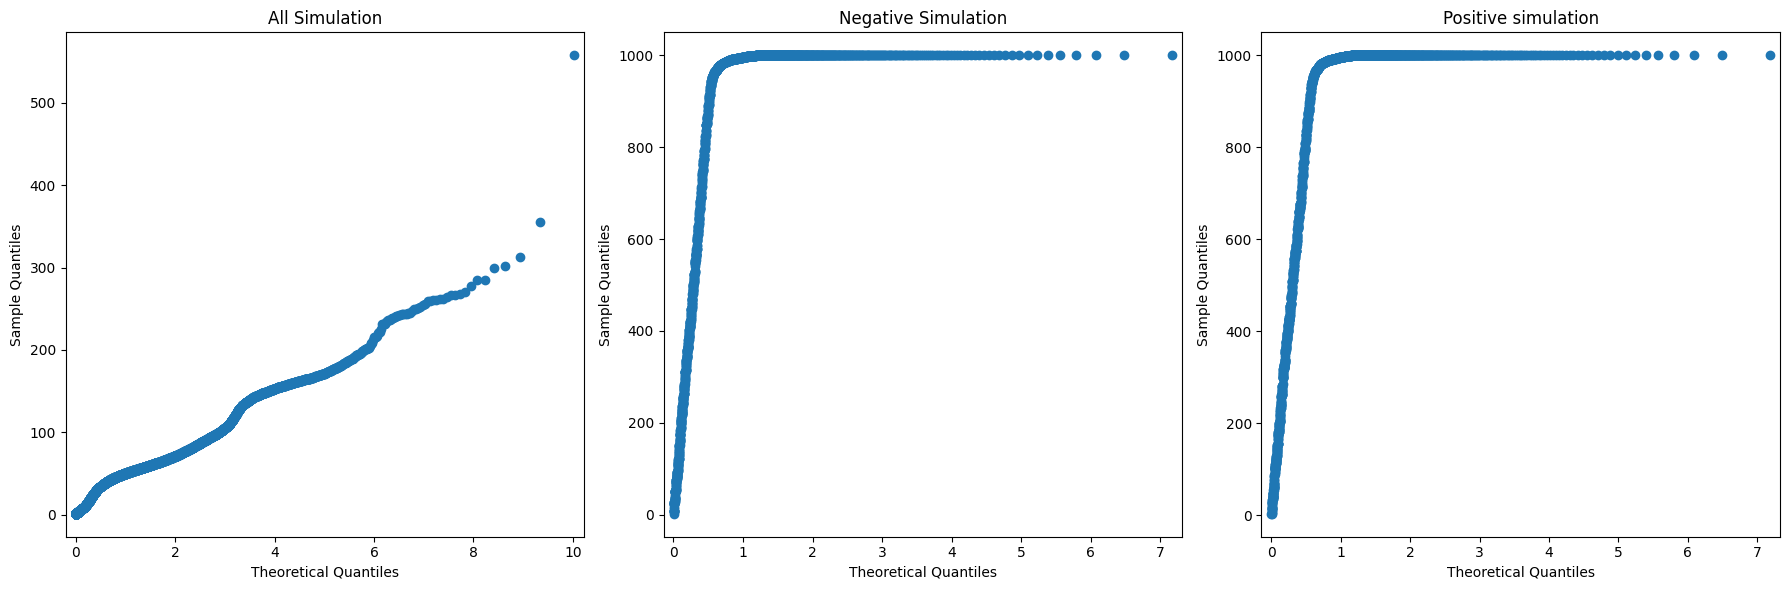

In [4]:
# QQ-plots for all datasets testing for exponential distribution #

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sm.qqplot(cleaned_leb_intervals, dist=stats.expon, ax=axes[0])
axes[0].set_title("All Simulation")

sm.qqplot(cleaned_neg_intervals, dist=stats.expon, ax=axes[1])
axes[1].set_title("Negative Simulation")

sm.qqplot(cleaned_pos_intervals, dist=stats.expon, ax=axes[2])
axes[2].set_title("Positive simulation")

#sm.qqplot(cleaned_v_intervals, dist=stats.expon, ax=axes[3])
#axes[3].set_title("V simulation")

plt.tight_layout()
plt.show()

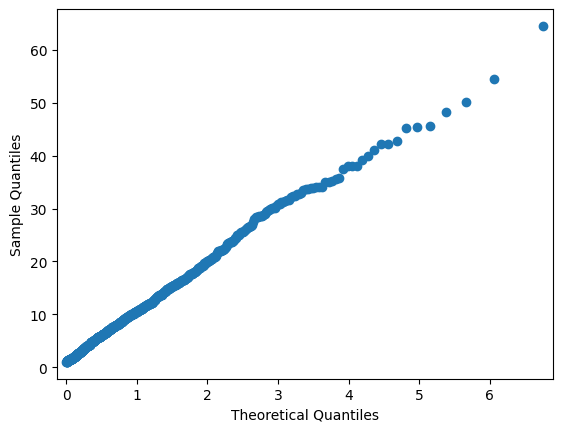

In [9]:
# QQ-plot of interval lengths in shallower well for negative dataset #
fig = sm.qqplot(cleaned_neg_pos_intervals, dist=stats.expon)
plt.show()

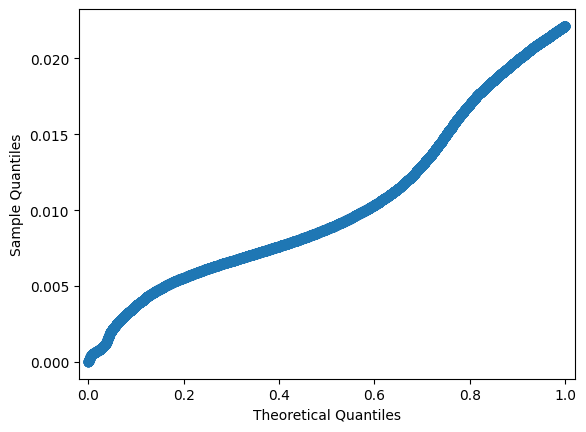

In [7]:
# Appling CDF and making QQ-plot to check for exponential distribution on moving potential #

def cdf_f(x, rate):
    return rate * np.exp(-rate * x)

leb_array = cleaned_leb_intervals.to_numpy()
cdf_leb = [cdf_f(leb_array[i], clean_leb_rate) for i in range(len(leb_array))]
l = np.array(cdf_leb)
fig = sm.qqplot(l, dist=stats.uniform)  
plt.show()

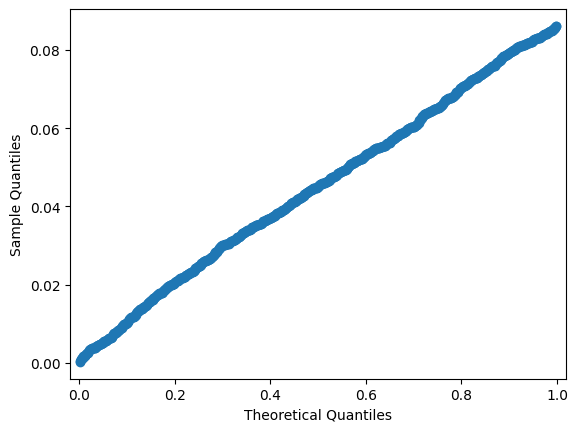

In [8]:
# Appling CDF and making QQ-plot to check for exponential distribution on shallower well. Shows the interval lengths in shallow wells are exponentially distributed #

leb_array = cleaned_neg_pos_intervals.to_numpy()
cdf_leb = [cdf_f(leb_array[i], clean_neg_pos_rate) for i in range(len(leb_array))]
l = np.array(cdf_leb)
fig = sm.qqplot(l, dist=stats.uniform)  
plt.show()